In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv ('bank_marketing_dataset.csv')

Z grafu vidíme, že mladí lidé byli většinou single.

A čím věk roste tím je větší pravděpodobnost, že je člověk v manželství.

Studenti jsou mladší a jsou většinou single

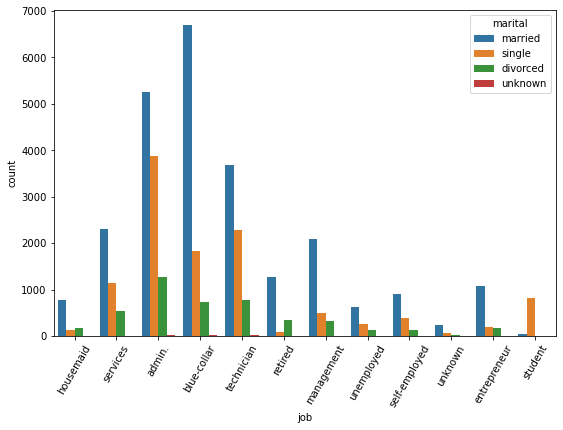

In [28]:
fig = plt.figure(figsize=((9,6)))
g = sns.countplot(data=df, x='job' , hue = 'marital')
g.tick_params(axis='x', rotation=60)


Z grafu je vidět, že v každé skupině lidí převažovalo manželsví, kromě studentů. Může to být tím, že banka se zajímala o finančně úspěšné lidi, a většina takových lidi jsou s rostoucím věkem v manželském sňatku. 

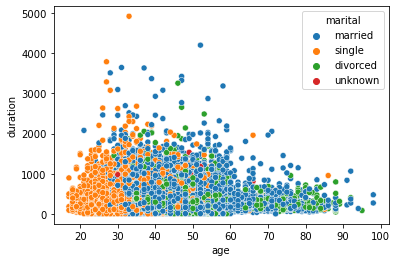

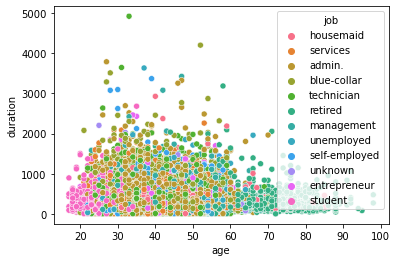

In [35]:
sns.scatterplot(data=df, x='age' ,y ='duration', hue = 'marital')
plt.show()
sns.scatterplot(data=df, x='age' ,y ='duration', hue = 'job')
plt.show()

Single lidi jsou většinou mladší 30 nad tenhle věk jsou převážně v manželství.
Můžeme si všimnou, že studenti jsou většinou mladší 30 let a z grafu víše vidíme, že mezi studenty a single lidi je velký průnik. Starší lidi jsou převážně v důchodě.

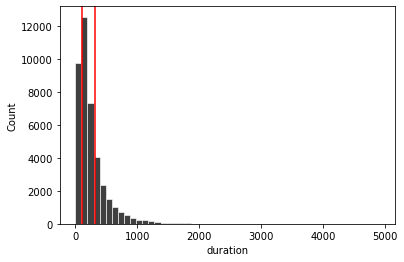

In [36]:
sns.histplot(df.duration, bins=50, edgecolor='white', color='black')
plt.axvline(df.duration.quantile(0.25), color='red')
plt.axvline(df.duration.quantile(0.75), color='red')


Většina hovorů trvala něco mezi 102 a 319 sekundami

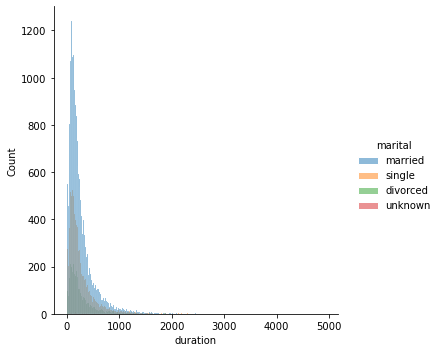

In [37]:
sns.displot(data=df, x='duration', hue='marital', edgecolor='white')


Klienti v manželsví strávili nejvíce času hovorem s bankou

In [64]:
df.select_dtypes

<bound method DataFrame.select_dtypes of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         c

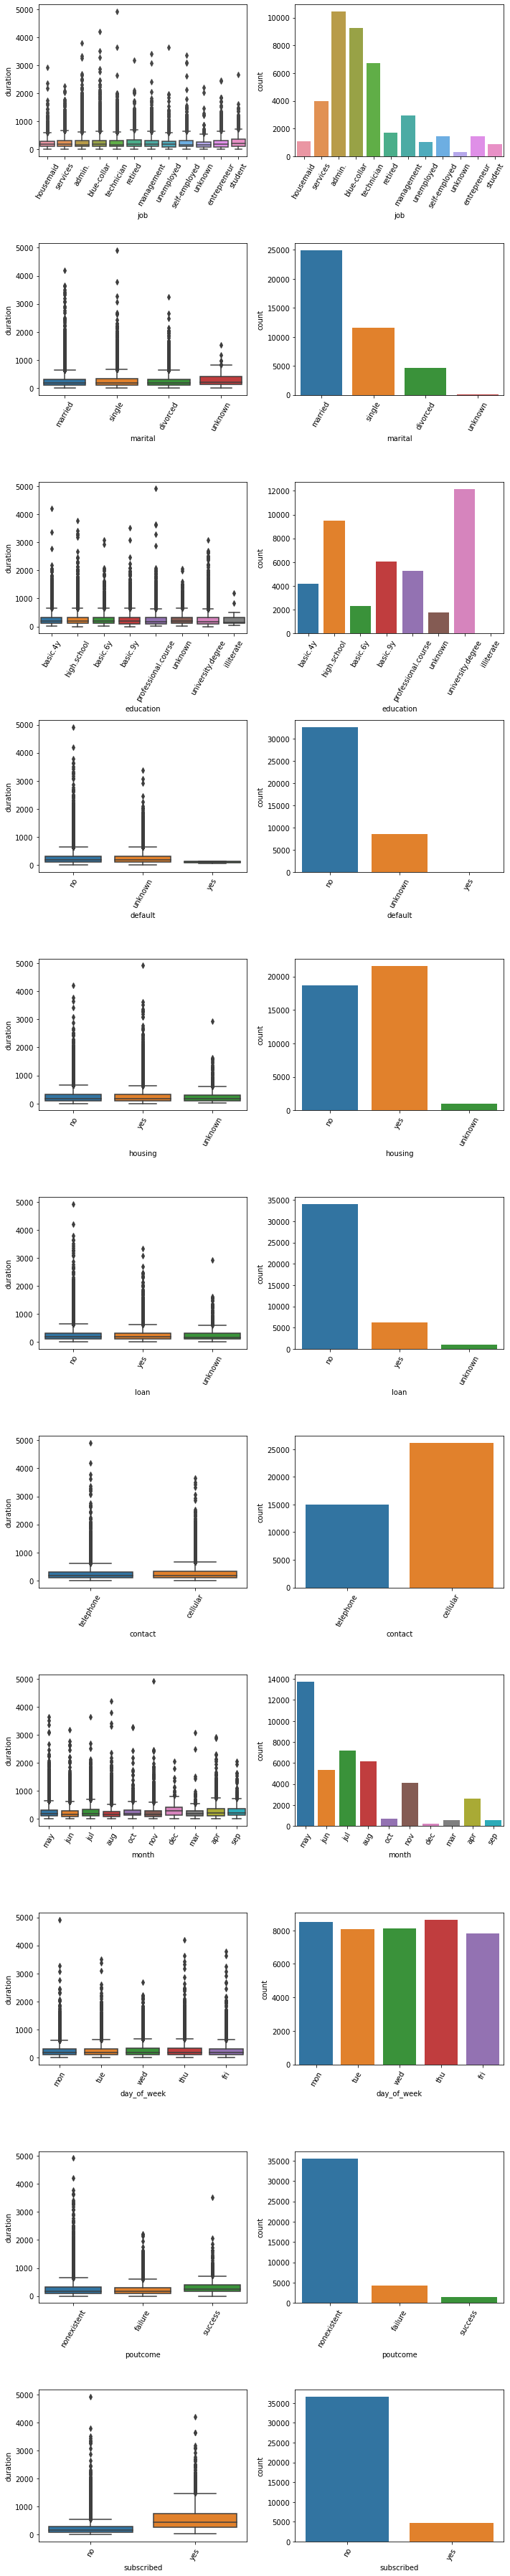

In [68]:
qualitative_columns = df.select_dtypes(exclude=np.number).columns

fig, axes = plt.subplots(len(qualitative_columns), 2, figsize=(10, 50))

for i, col in enumerate(qualitative_columns):
    ax_left = fig.axes[2*i]
    ax_right = fig.axes[2*i + 1]
    sns.boxplot(data=df, x=col, y='duration', ax=ax_left)
    ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
    sns.countplot(data=df, x=col, ax=ax_right)
    ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
        
fig.tight_layout()



Banka kontaktovala většinou lidi s univerzitním titulem, pravděpodobně proto, že jsou finančně úspěšní.

Většinově lidi kontaktované bankou neměli půjčku a spláceli své dluhy jak měli (dafault)

Převážně kontaktovali přes mobilní telefon. 

Kampaň začala v květnu, v němž bylo taky nejvíce kontaktů a pak to většinou klesalo.

Většina kontaktů neměla předchozí kontakt s bankou.

Subscribe je většinou nízký, takže navázali úspěšný kontakt jen s málo klienty.

Klienti, kteří subcsribli, strávili hovorem delší dobu než ti, co nesubscribli.

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

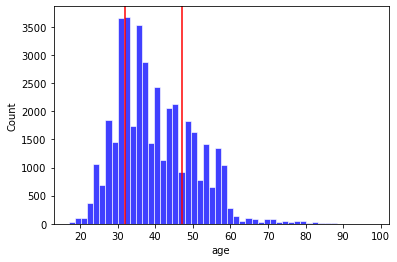

In [27]:
sns.histplot(df.age, bins=50, edgecolor='white', color='blue')
plt.axvline(df.age.quantile(0.75), color='red')
plt.axvline(df.age.quantile(0.25), color='red')
plt.show()


Z grafu můžeme zpozorovat, že nejběžnější věk zákazníků je mezi cca 32-47 lety.

In [41]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:>

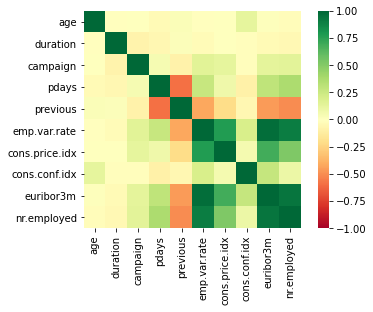

In [42]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1)

 


13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

21 - subscribed : has the client subscribed a term deposit? (binary: 'yes','no')

Pdays a previous maji velkou negativní korelaci. Jelikož kontaktovali většinu lidí v této kampani poprvé, tak pdays většiny
je nastaven na 999 (nebyl předchozí kontakt) a tito lidi mají previous 0 (předchozí kontakty nebyl ). Atributy korelující pozitivně s pdays korelují negativně s previous a naopak.

Dále koreluje většina numerický atributů (emp.var.rate a nr.employed, emp.var.rate a euribor3m, euribor3m a nr.employed, cons.price.idx a nr.employed, cons.price.idx a euribor3m,...). Nejsem si jistý, co přesně jednotlivé atributy znamenají i přes to, že je na oficiálním webu legenda, moc jejich významu nerozumím. Ale nejspíš budou spojeny s výplatami lidí.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'unknown'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'illiterate')])

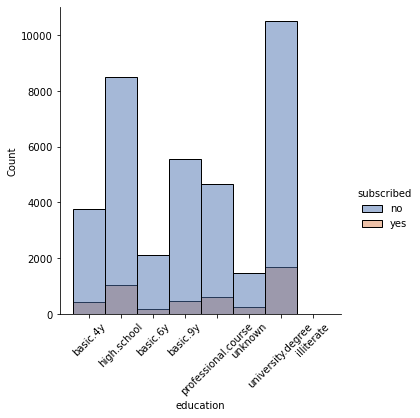

In [39]:
#sns.barplot(data = df, x = 'job' ,y= 'education')
sns.displot(data=df, x='education', hue='subscribed', palette='deep')
plt.xticks(rotation=45)


Většina zákazníků nepřistoupila na s bankou na žádnou smlouvu.
A ti, co přistoupili, měli buď vysokoškolské nebo středoškolské vzdělání. 

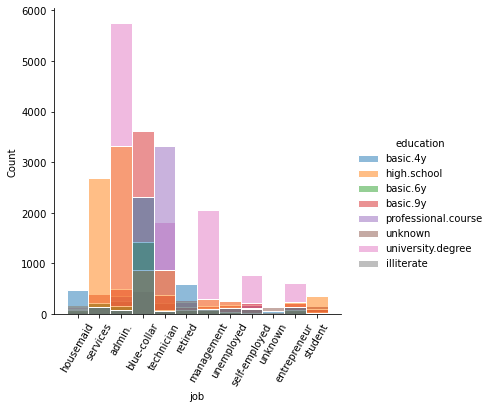

In [40]:
ax = sns.displot(data=df, x='job', hue='education', edgecolor='white')
ax.set_xticklabels(rotation=60)


Z grafu se dá vyčíst, že lidi s univerzitním vzděláním jsou na vysokých pozicích jako admin, manager, podnikatelé a živnostníci. Dá se říct, že vzdělání dobrý faktor, aby člověka banka kontaktovala.
Banky kontaktovali nejvíce lidí na pozici admin

In [83]:
data25_33 = df.loc[(df['age'] >= 25) & (df['age'] < 33)]
data16_25 = df.loc[(df['age'] >= 16) & (df['age'] < 25)]
data33_40 = df.loc[(df['age'] >= 33) & (df['age'] < 40)]
data40_50 = df.loc[(df['age'] >= 40) & (df['age'] < 50)]
data_married = df.loc[ df['marital'] == 'married']
data_single = df.loc[ df['marital'] == 'single']
data_education = df.loc[ df['education'] == 'university.degree']

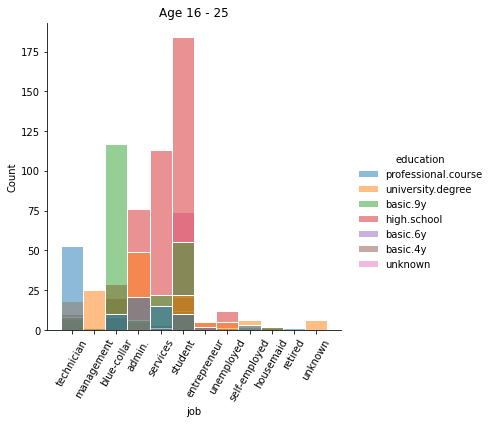

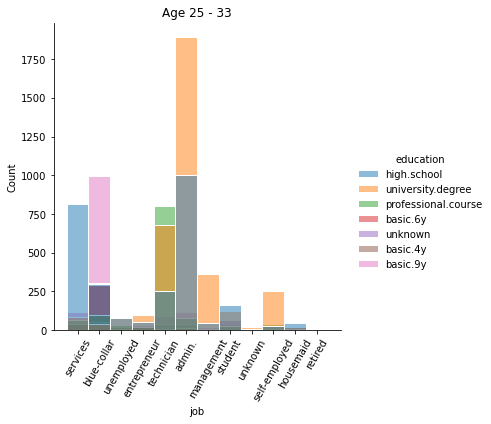

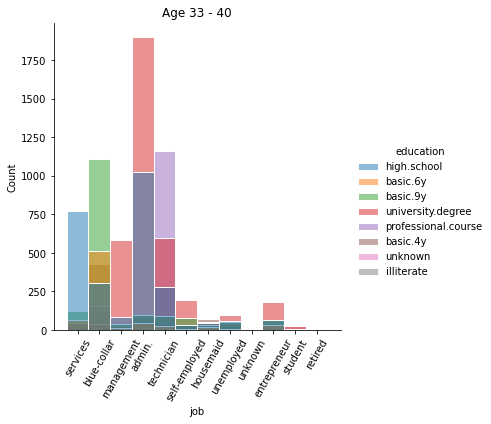

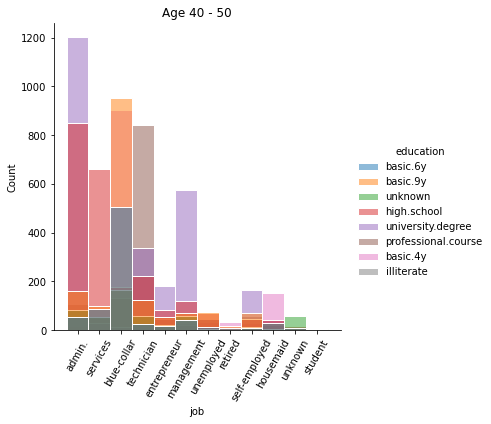

In [86]:
ax = sns.displot(data=data16_25, x='job', hue='education', edgecolor='white')
ax.set_xticklabels(rotation=60)
plt.title("Age 16 - 25")
plt.show()

ax = sns.displot(data=data25_33, x='job', hue='education', edgecolor='white')
ax.set_xticklabels(rotation=60)
plt.title("Age 25 - 33")
plt.show()

ax = sns.displot(data=data33_40, x='job', hue='education', edgecolor='white')
ax.set_xticklabels(rotation=60)
plt.title("Age 33 - 40")
plt.show()

ax = sns.displot(data=data40_50, x='job', hue='education', edgecolor='white')
ax.set_xticklabels(rotation=60)
plt.title("Age 40 - 50")
plt.show()



U všech věkový skupin převažuje zaměstnaní admin až na věkovou skupinu mezi 16 a 25 lety, u niž je nejběžnější být student. Většina lidí mezi 16 - 25 má jen středoškolské vzdělání, zatímco u všech ostatních skupin převažuje univerzitní. Technici mají nehledě na věk většinou profesní kurz.

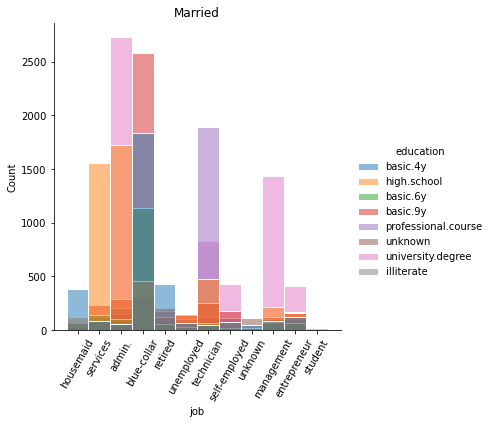

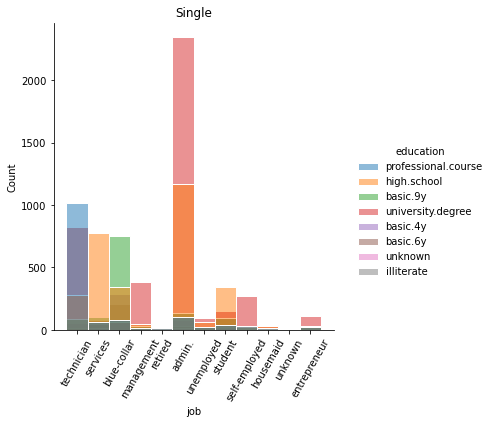

In [89]:
ax = sns.displot(data=data_married, x='job', hue='education', edgecolor='white')
ax.set_xticklabels(rotation=60)
plt.title("Married")
plt.show()

ax = sns.displot(data=data_single, x='job', hue='education', edgecolor='white')
ax.set_xticklabels(rotation=60)
plt.title("Single")
plt.show()



Admin je nejvíc obsazené zaměstnání jak mezi svobodnými, tak i lidmi v manželsví. Ale u svobodných to převažuje víc jak dvakrát nad jakoukoliv jinou prací. U lidí v manželsví dělá skoro stejně lidí admina jako blue-collar.

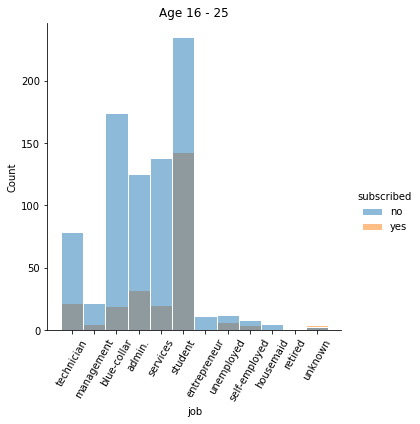

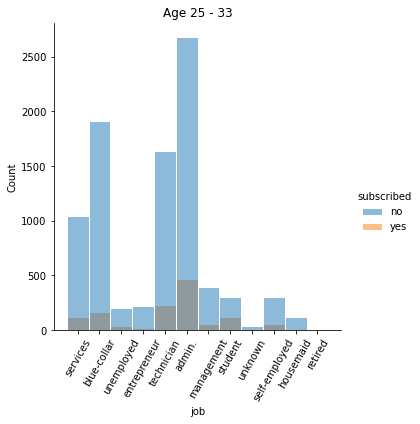

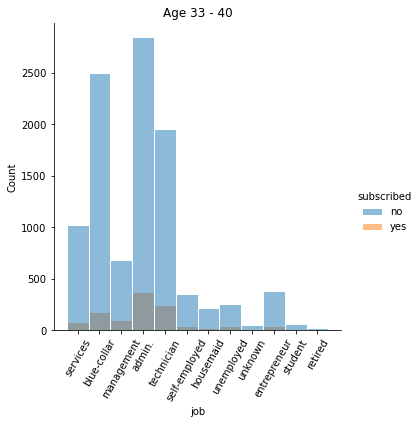

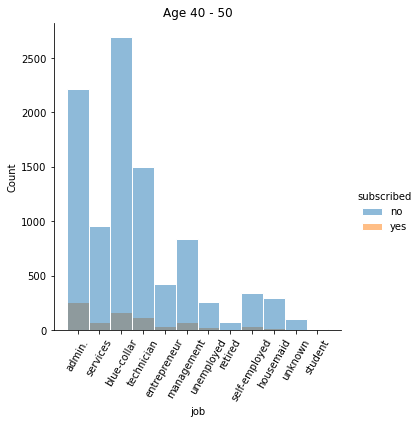

In [90]:
ax = sns.displot(data=data16_25, x='job', hue='subscribed', edgecolor='white')
ax.set_xticklabels(rotation=60)
plt.title("Age 16 - 25")
plt.show()

ax = sns.displot(data=data25_33, x='job', hue='subscribed', edgecolor='white')
ax.set_xticklabels(rotation=60)
plt.title("Age 25 - 33")
plt.show()

ax = sns.displot(data=data33_40, x='job', hue='subscribed', edgecolor='white')
ax.set_xticklabels(rotation=60)
plt.title("Age 33 - 40")
plt.show()

ax = sns.displot(data=data40_50, x='job', hue='subscribed', edgecolor='white')
ax.set_xticklabels(rotation=60)
plt.title("Age 40 - 50")
plt.show()

Procentuální uspěšnost navázání kontaktu byla celkově nízká. Ale u studujících a nezaměstnaných lidí mezi 16 - 25 lety byla úspěšnost více jak 50 %.  Možná to bude proto, že si mladí studenti berou studentské pujčky.

Poslední bunka